In [1]:
import numpy as np
import pandas as pd
import tushare as ts
from pymongo import MongoClient, ASCENDING, DESCENDING


In [2]:
ts.set_token('4c1d16a895e4c954adc8d2a436f2b21dd4ccc514f0c5a192edaa953b')
pro = ts.pro_api()
mc = MongoClient('localhost', 27017)  # Mongo连接
db_stock_digu = mc['stock_digu']  # 数据库
class StockMongodb:
    def __init__(self, hostname='127.0.0.1', db_port=27017):

        """初始化类，初始化数据库连接"""

        self.hostname = hostname
        self.db_port = db_port
        self.my_mongo_client = MongoClient(self.hostname, self.db_port)

    def df2mongo(self, df_data, db_name, form_name):

        """DataFrame数据写入mongodb"""

        def df2bson(df):

            """DataFrame类型转化为Bson类型"""

            data = json.loads(df.T.to_json()).values()
            return data

        my_db = self.my_mongo_client[db_name]
        bson_data = df2bson(df_data)
        my_posts = my_db[form_name]
        result = my_posts.insert_many(bson_data)
        return result

    def collection2df(self, db_name, collection_name, query={}, no_id=True):

        """查询数据库，导出DataFrame类型数据
        （db_name：数据库名 collection_name：集合名 
         query：查询条件式 no_id：不显示ID,默认为不显示ID）"""

        db = self.my_mongo_client[db_name]
        collection = self.my_mongo_client[db_name][collection_name]
        cursor = collection.find(query)
        df = pd.DataFrame(list(cursor))
        if no_id:
            del df['_id']
        return df

In [3]:
# df_index_sh_db = db_stock_digu['000001_SH'].find({}, {'_id': 0})
# df_index_sh_db = db_stock_digu['000001_SH'].find({'trade_date': {"$gte": '20150101', '$lte': '20191231'}}, {'_id': 0})
stock_mongodb = StockMongodb()
# df_index_sh_db = stock_mongodb.collection2df('stock_digu', '000001_SH')
# df_index_sh_db = stock_mongodb.collection2df('stock_digu', '000001_SH', query={'trade_date': {"$gte": '20000101', '$lte': '20181231'}})
df_short_8_pct = stock_mongodb.collection2df('stock_digu', 'short_8_pct', query={'trade_date': {"$gte": '20100101'}})

In [54]:
df_short_8_pct.describe()

,cnt_stock,cnt_stock_bear,cnt_stock_bull,pcg_chg_mean_bull,pcg_chg_median,pcg_chg_median_bull,pct_chg_yes_bear_mean,pct_chg_yes_bull_mean,pct_chg_yes_shocked_mean
count,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000
mean,2030.471567,34.361073,37.772076,0.043730,-0.205824,-0.210186,-1.655733,1.625709,-0.305952
std,402.432589,175.149928,84.240544,1.906746,1.982102,1.972287,3.216229,2.339237,3.223502
min,1116.000000,0.000000,0.000000,-9.776194,-9.999000,-9.999000,-10.026500,-7.977838,-10.057600
25%,1622.000000,0.000000,12.000000,-0.716061,-0.900125,-0.888075,-3.558524,0.234050,-2.275488
50%,2123.000000,3.000000,21.000000,0.184515,0.000000,0.000000,-0.404500,1.646760,-0.096000
75%,2290.500000,9.000000,36.000000,1.038830,0.780975,0.772775,0.000000,3.107613,1.662142
max,2908.000000,1947.000000,1684.000000,9.707023,10.000100,10.000100,10.029000,10.041200,10.052900


In [53]:
df_short_8_pct[df_short_8_pct['cnt_stock_bear'] == 0]

,trade_date,cnt_stock,cnt_stock_bear,cnt_stock_bull,pcg_chg_mean_bull,pcg_chg_median,pcg_chg_median_bull,pct_chg_yes_bear_mean,pct_chg_yes_bull_mean,pct_chg_yes_shocked_mean
0,20100104,1408,0,10,0.212837,-0.09765,-0.09765,0.00000,-0.294271,0.000000
1,20100105,1405,0,19,0.971116,0.79300,0.79300,0.00000,2.051090,1.480000
2,20100106,1407,0,8,-0.204055,-0.40750,-0.40750,0.00000,0.551221,0.000000
3,20100107,1402,0,8,-2.035396,-2.51510,-2.51510,0.00000,1.067271,-2.706750
4,20100108,1391,0,16,1.069966,0.82320,0.82320,0.00000,2.500629,3.537300
...,...,...,...,...,...,...,...,...,...,...
1905,20171107,2574,0,25,0.558336,0.27760,0.27760,-0.95954,1.431800,-1.535550
1908,20171110,2574,0,25,0.087105,-0.26020,-0.26020,-1.16700,2.127835,0.392750
1932,20171214,2551,0,16,0.103921,-0.14600,-0.14600,-1.12030,0.965864,0.000000
1949,20180109,2581,0,14,-0.079973,-0.29830,-0.29830,1.76465,0.698577,0.402975


In [73]:
from trade_stock_digu.data_service import DataServiceTushare
ts_tushare = DataServiceTushare()
lst_stock = ts_tushare.get_stock_basic_lst()
for item_stock in lst_stock:
    df_20100107 = stock_mongodb.collection2df('stock_digu', item_stock['ts_code'], query={'trade_date': {"$gte": '20100107', "$lt": '20100108'}}, no_id=False)
    if df_20100107.empty is True:
        continue
    if df_20100107.loc[0, 'pct_chg'] < -7.:
        print(df_20100107)
    


                        _id    ts_code trade_date    open    high     low  \
0  5fb0b4b4624827b069c503fb  000906_SZ   20100107  5.4192  5.4461  5.0383   

   close  pre_close  change  pct_chg  ...  high_250  high_500   low_5  low_10  \
0  5.049       5.43  -0.381  -7.0166  ...    6.3475    8.3198  5.0383  4.9042   

   low_20  low_30  low_60  low_120  low_250  low_500  
0  4.8827  4.8827  3.9222   3.3267    1.438   1.1912  

[1 rows x 54 columns]
                        _id    ts_code trade_date     open     high      low  \
0  5fb0b6a0624827b069d4471a  002048_SZ   20100107  13.3522  13.3522  12.1211   

     close  pre_close  change  pct_chg  ...  high_250  high_500    low_5  \
0  12.2659    13.3251 -1.0592  -7.9489  ...   13.7324   16.6279  12.1211   

    low_10   low_20  low_30  low_60  low_120  low_250  low_500  
0  11.9401  11.6866  9.8309  8.0113   6.8979   3.1978   2.4702  

[1 rows x 54 columns]
                        _id    ts_code trade_date     open     high      low  \
0 

In [4]:
df_short_8_pct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2163 entries, 0 to 2162
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   trade_date                2163 non-null   object 
 1   cnt_stock                 2163 non-null   int64  
 2   cnt_stock_bear            2163 non-null   int64  
 3   cnt_stock_bull            2163 non-null   int64  
 4   pcg_chg_mean_bull         2163 non-null   float64
 5   pcg_chg_median            2163 non-null   float64
 6   pcg_chg_median_bull       2163 non-null   float64
 7   pct_chg_yes_bear_mean     2163 non-null   float64
 8   pct_chg_yes_bull_mean     2163 non-null   float64
 9   pct_chg_yes_shocked_mean  2163 non-null   float64
dtypes: float64(6), int64(3), object(1)
memory usage: 169.1+ KB


In [5]:
df_short_8_pct.describe()

,cnt_stock,cnt_stock_bear,cnt_stock_bull,pcg_chg_mean_bull,pcg_chg_median,pcg_chg_median_bull,pct_chg_yes_bear_mean,pct_chg_yes_bull_mean,pct_chg_yes_shocked_mean
count,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000
mean,2030.471567,34.361073,37.772076,0.043730,-0.205824,-0.210186,-1.655733,1.625709,-0.305952
std,402.432589,175.149928,84.240544,1.906746,1.982102,1.972287,3.216229,2.339237,3.223502
min,1116.000000,0.000000,0.000000,-9.776194,-9.999000,-9.999000,-10.026500,-7.977838,-10.057600
25%,1622.000000,0.000000,12.000000,-0.716061,-0.900125,-0.888075,-3.558524,0.234050,-2.275488
50%,2123.000000,3.000000,21.000000,0.184515,0.000000,0.000000,-0.404500,1.646760,-0.096000
75%,2290.500000,9.000000,36.000000,1.038830,0.780975,0.772775,0.000000,3.107613,1.662142
max,2908.000000,1947.000000,1684.000000,9.707023,10.000100,10.000100,10.029000,10.041200,10.052900


In [22]:
np.percentile(df_short_8_pct['pcg_chg_median'],10)

-2.1708899999999995

In [49]:
df_new = df_short_8_pct[['pct_chg_yes_bear_mean', 'pct_chg_yes_bull_mean', 'pct_chg_yes_shocked_mean']]

TypeError: 'bool' object is not callable

In [46]:
df_new.loc[:,'y'] = df_short_8_pct.loc[:,'pcg_chg_mean_bull'].shift(-1)

c:\vnstudio\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\vnstudio\lib\site-packages\pandas\core\indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [50]:
df_new[df_new['y'] < -2.0]

,pct_chg_yes_bear_mean,pct_chg_yes_bull_mean,pct_chg_yes_shocked_mean,y
2,0.000000,0.551221,0.000000,-2.035396
11,-0.043700,3.233310,-1.481600,-3.451759
13,-0.526455,-1.565787,-0.834143,-2.552538
15,-1.993755,-7.148700,-5.576700,-3.870406
37,0.000000,3.696153,-1.853400,-3.430779
...,...,...,...,...
2129,-2.353888,-0.389711,0.428457,-7.565741
2132,-2.184811,-0.190919,-2.535206,-2.009168
2134,-1.407257,3.269163,-0.994321,-3.150666
2157,-4.087638,2.465542,-1.342524,-2.713235


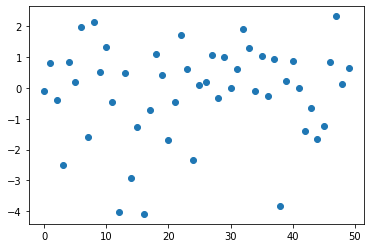

In [18]:
import matplotlib.pyplot as plt
y_df = df_short_8_pct['pcg_chg_median_bull']
y = np.array(y_df)
plt.scatter(range(y.size)[:50], y[:50])
plt.show()

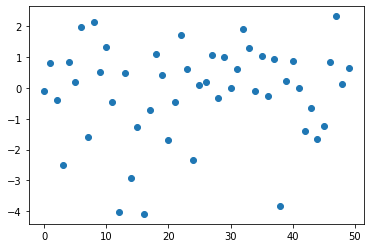

In [11]:
y.size

1329